In [292]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astroquery.gaia import Gaia
import astropy

In [293]:
#%matplotlib widget
%matplotlib inline

In [294]:
#from platform import python_version
#python_version()

In [295]:
plt.rc('xtick', labelsize=12)
plt.rc('ytick', labelsize=12)
plt.rcParams['axes.linewidth'] = 1.0


font = {'family' : 'serif',
        'weight' : 'normal',
        'size'   : 13}

plt.rc('font', **font)

## Getting the directory name

In [296]:
import os
directory_path = os.getcwd()
nome_aglo = directory_path.split('/')[-1]
nome_aglo

'NGC_2204'

## Getting RA&DEC from Bica 2019

In [297]:
df = pd.read_csv('../../lista.txt', comment= '#')
ra, dec = df.loc[df['Nome'] == nome_aglo]['_RAJ2000'].values[0], df.loc[df['Nome'] == nome_aglo]['_DEJ2000'].values[0]

## Querying the data

In [298]:
tables = Gaia.load_tables(only_names=True)

INFO: Retrieving tables... [astroquery.utils.tap.core]
INFO: Parsing tables... [astroquery.utils.tap.core]
INFO: Done. [astroquery.utils.tap.core]


In [299]:
meta = Gaia.load_table('gaiadr3.gaia_source')
meta

Retrieving table 'gaiadr3.gaia_source'


In [350]:
query = """SELECT 
source_id, ra, dec, pmra, pmra_error, pmdec, pmdec_error, bp_rp, phot_g_mean_mag, parallax, parallax_error, radial_velocity, radial_velocity_error, l,b, 
ruwe, phot_g_n_obs, phot_bp_n_obs, phot_rp_n_obs
FROM gaiadr3.gaia_source
WHERE 1=CONTAINS(POINT('ICRS',ra,dec),
CIRCLE('ICRS', """ +  str(ra) + ',' + str(dec) + ',' + ' 0.4))'

In [351]:
job = Gaia.launch_job_async(query)
job

INFO: Query finished. [astroquery.utils.tap.core]


In [352]:
data = job.get_results()
len(data)

12298

In [353]:
#data

## Converting to pandas

In [354]:
df = data.to_pandas()
df

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b,ruwe,phot_g_n_obs,phot_bp_n_obs,phot_rp_n_obs
0,2942722612659805824,93.939871,-18.301818,-0.334318,0.204741,0.743745,0.234000,1.184717,19.250019,0.379827,0.233988,NaN,NaN,225.688907,-15.914363,1.048615,440,45,46
1,2942680144022193152,93.518040,-18.834443,3.243275,0.623104,-1.123985,0.816087,1.931870,20.476368,1.159100,0.826866,NaN,NaN,226.028525,-16.495077,0.990298,291,20,34
2,2942680144022193664,93.520386,-18.824107,6.281590,0.070372,-21.213875,0.091378,0.896082,17.407179,0.361461,0.083660,NaN,NaN,226.019583,-16.488894,0.989582,347,41,39
3,2942680148319136640,93.520884,-18.830334,0.911085,1.291363,0.999948,2.026232,1.413389,20.783871,3.535663,1.599987,NaN,NaN,226.025727,-16.490963,1.070149,179,15,16
4,2942680148320567808,93.516141,-18.831586,-2.295606,0.016955,8.735252,0.021796,0.689901,14.439487,0.725735,0.020717,23.448488,6.741878,226.025044,-16.495577,1.030541,371,44,42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12293,2941974055696827264,94.094211,-18.330112,NaN,NaN,NaN,NaN,NaN,19.849895,NaN,NaN,NaN,NaN,225.777530,-15.791884,NaN,118,0,0
12294,2941974085758978816,94.101965,-18.319984,NaN,NaN,NaN,NaN,0.887236,20.860384,NaN,NaN,NaN,NaN,225.771011,-15.781048,NaN,102,12,11
12295,2941974085758979584,94.110117,-18.318792,-4.147924,0.254394,2.809266,0.275040,1.972862,19.435997,0.455976,0.265495,NaN,NaN,225.773140,-15.773491,0.994363,424,44,43
12296,2941974085758979968,94.106168,-18.318509,0.531744,0.382489,1.183802,0.483175,0.787193,20.312996,0.616039,0.511935,NaN,NaN,225.771291,-15.776803,0.990472,416,37,36


In [355]:
#import plotly.express as px

In [356]:
#fig = px.scatter(x = df.pmra_error, y = df.pmra)
#fig.show()

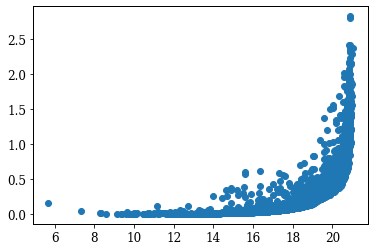

In [357]:
fig, ax = plt.subplots()

ax.scatter(df.phot_g_mean_mag, df.pmra_error)

## Applying better conditions to the variables

In [358]:
condicao = np.abs(0.5*df.pmra) < df.pmra_error
condicao2 = np.abs(0.5*df.pmdec) < df.pmdec_error
condicao3 = np.abs(0.5*df.parallax) < df.parallax_error


df_condicionado = df.drop(df[condicao|condicao2|condicao3].index) #
len(df_condicionado),len(df)

(5547, 12298)

## Dropping uknown values of pmra, pmdec or parallax.

In [359]:
ndf = df_condicionado.dropna(how='any',subset=['pmra', 'pmra_error', 'pmdec', 'pmdec_error', 'parallax', 'parallax_error'])
ndf

,source_id,ra,dec,pmra,pmra_error,pmdec,pmdec_error,bp_rp,phot_g_mean_mag,parallax,parallax_error,radial_velocity,radial_velocity_error,l,b,ruwe,phot_g_n_obs,phot_bp_n_obs,phot_rp_n_obs
2,2942680144022193664,93.520386,-18.824107,6.281590,0.070372,-21.213875,0.091378,0.896082,17.407179,0.361461,0.083660,NaN,NaN,226.019583,-16.488894,0.989582,347,41,39
4,2942680148320567808,93.516141,-18.831586,-2.295606,0.016955,8.735252,0.021796,0.689901,14.439487,0.725735,0.020717,23.448488,6.741878,226.025044,-16.495577,1.030541,371,44,42
6,2942680178381932416,93.524963,-18.813714,0.816504,0.293292,4.332892,0.371917,2.504444,19.454386,1.968449,0.337828,NaN,NaN,226.011470,-16.480753,1.057806,332,32,37
10,2942680251399778048,93.521698,-18.810323,0.173910,0.014639,1.505146,0.018504,1.253249,13.980922,0.192931,0.017363,111.842827,2.757483,226.006937,-16.482222,1.004288,377,45,40
11,2942680281461147392,93.535597,-18.816914,1.553131,0.196674,1.219080,0.231261,1.221148,18.971346,0.648402,0.225180,NaN,NaN,226.018742,-16.472820,0.952527,350,36,38
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12287,2941974021337087104,94.122122,-18.327182,2.679162,0.046449,-17.759080,0.054300,2.335271,16.957335,3.120396,0.057307,NaN,NaN,225.785912,-15.766478,0.926197,460,49,48
12288,2941974021337284864,94.119193,-18.333877,-0.131680,0.020220,8.216722,0.024159,0.817365,15.218232,0.562803,0.024538,NaN,NaN,225.791099,-15.771734,0.939766,420,46,43
12289,2941974051400769536,94.102127,-18.333777,-3.598885,0.038358,-12.873812,0.048070,2.521668,16.494400,3.155870,0.050172,NaN,NaN,225.784178,-15.786501,1.050547,423,44,44
12290,2941974055693123712,94.094090,-18.330398,-2.358823,0.037225,0.465341,0.042664,0.909672,15.966064,0.760948,0.045566,NaN,NaN,225.777753,-15.792105,1.262737,455,48,46


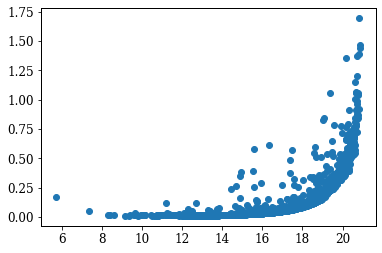

In [360]:
fig, ax = plt.subplots()

ax.scatter(ndf.phot_g_mean_mag, ndf.pmra_error)

In [361]:
#.Definicão da função de correção de area
#.(calcula a parte da area de um círculo que esta fora das bordas da imagem)
def area_cor( radata, dedata, ap ):

    cosd = np.cos(dedata*np.pi/180.0)
    rarg = [min(radata),max(radata)]
    derg = [min(dedata),max(dedata)]
    
    b = np.array([(rarg[1]-radata)*cosd, (radata-rarg[0])*cosd, ap])
    c = np.array([ derg[1]-dedata, dedata-derg[0], ap ])
    b = np.min(b,axis=0)  ;  c = np.min(c,axis=0)
    P = 0.5*np.pi*ap**2 - c*np.sqrt(ap**2-c**2) - np.arcsin(c/ap)*ap**2
    Q = 0.5*np.pi*ap**2 - b*np.sqrt(ap**2-b**2) - np.arcsin(b/ap)*ap**2
    O = 0.5*( -c*np.sqrt(ap**2-c**2) - b*np.sqrt(ap**2-b**2) + \
     np.arccos(c/ap)*ap**2 - np.arcsin(b/ap)*ap**2) + c*b
    O = O*(abs(b) < np.sqrt(ap**2-c**2))
    area_cor = -P -Q +O
    return area_cor

0.000730527867915684


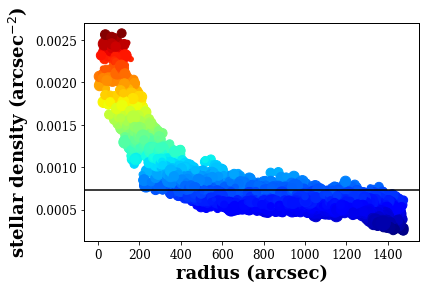

In [362]:
from astropy.coordinates import SkyCoord
from astropy import units
from sklearn.neighbors import NearestNeighbors


catalog = SkyCoord(ra=ndf['ra']*units.degree, dec=ndf['dec']*units.degree, frame='fk5')

nstar = len(ndf)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([ndf['ra'], ndf['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2 + area_cor(ndf.ra, ndf.dec, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(ndf['ra'], weights=den_data)
std_x = np.average((ndf['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(ndf['dec'], weights=den_data)
std_y = np.average((ndf['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value

#.criando figura do RDP

import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()#1,1,figsize=(10,11))
ax.scatter(radii,den_data, s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')


norm_den = den_data/np.max(den_data)
bg_select = (norm_den > 0.25) & (norm_den < 0.35)
med_bg = np.median(den_data[bg_select])
std_bg = 0.5*med_bg


ax.axhline(med_bg, color = 'k')
print(med_bg)



In [363]:
raio_max = np.max(radii)*units.arcsec
raio_max = raio_max.to(units.radian).value
dens = med_bg
dens = dens*(1/units.arcsec*(1/units.arcsec))
dens = dens.to(1/units.sr).value
estrelas = len(df_condicionado) - dens*np.pi*raio_max**2
estrelas

541.8202108151954

## Creating the arrays to perform the 5-D HDBSCAN fit

In [364]:
cincoD = np.dstack((ndf['pmra'],ndf['pmdec'],ndf['ra'],ndf['dec'],ndf['parallax']))[0]

## Performing the HDBSCAN

In [365]:
import hdbscan

In [366]:
from sklearn.preprocessing import RobustScaler

scaled = RobustScaler().fit_transform(cincoD)

Estimated no. of clusters: 1
Estimated no. of noise points: 3882
Estimated no. points clustered: 541


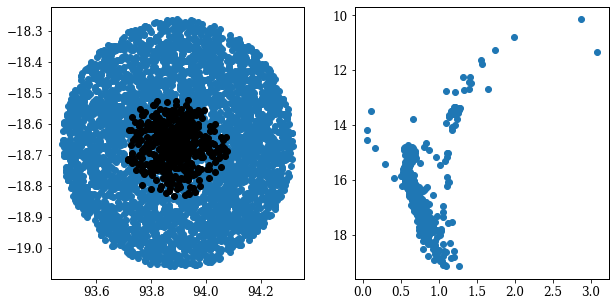

In [367]:
pts_expected = int(estrelas)

clusterer = hdbscan.HDBSCAN(min_cluster_size = pts_expected, min_samples = 400, allow_single_cluster=True, cluster_selection_method = 'eom', metric = 'euclidean').fit(scaled)


labels = clusterer.labels_


ndf = ndf.assign(labels=labels)


N_clus=len(set(labels))-(1 if -1 in labels else 0)
print('Estimated no. of clusters: %d' % N_clus)

n_noise = list(clusterer.labels_).count(-1)
print('Estimated no. of noise points: %d' % n_noise)

n_in = list(clusterer.labels_).count(0)
print('Estimated no. points clustered: %d' % n_in)

subset = ndf[ndf.labels == 0]


fig, ax = plt.subplots(1,2, figsize=(10,5))

ax[0].scatter(subset.ra,subset.dec, color = 'k', zorder = 100)
ax[0].scatter(ndf.ra,ndf.dec)

ax[1].scatter(subset['bp_rp'],subset['phot_g_mean_mag'])
ax[1].invert_yaxis()


## Parameters

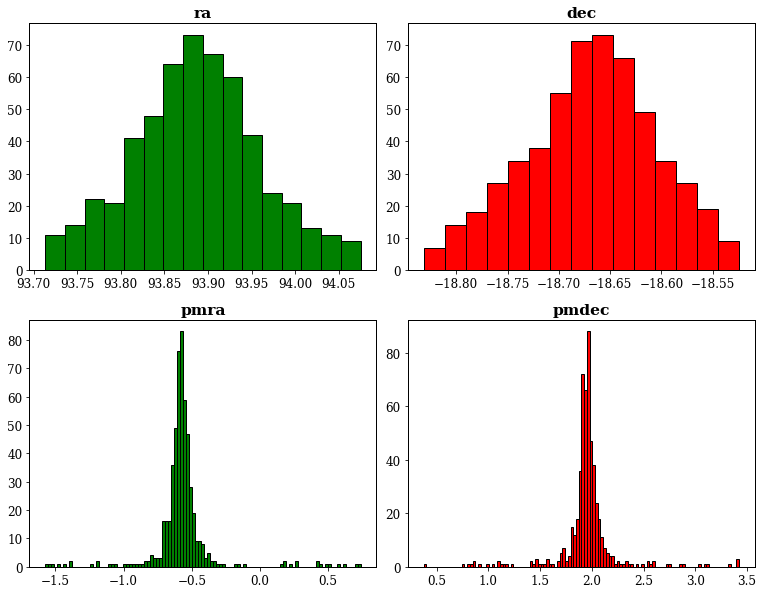

In [368]:
fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(subset['ra'], bins = 'fd')
ax1.hist(subset['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['pmra'], bins = 'fd')
ax2.hist(subset['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(subset['dec'], bins = 'fd')
ax3.hist(subset['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(subset['pmdec'], bins = 'fd')
ax4.hist(subset['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


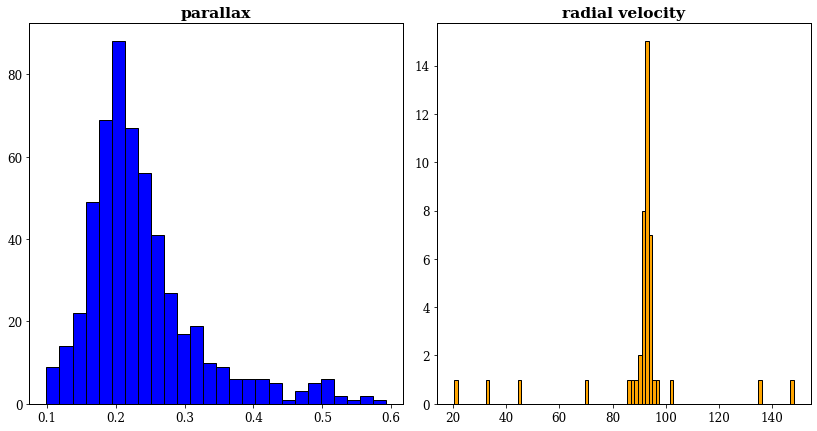

In [369]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(subset['parallax'], bins = 'fd')
ax1.hist(subset['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## Gaussian fit

In [370]:
def gaussiana(x, amp, mu, sigma):
    return amp*np.exp(-(x-mu)**2/(2*sigma**2))

from lmfit.models import GaussianModel

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 26
    # variables        = 3
    chi-square         = 859.646211
    reduced chi-square = 37.3759222
    Akaike info crit   = 96.9590340
    Bayesian info crit = 100.733324
[[Variables]]
    amplitude:  9.44061285 +/- 0.44220786 (4.68%) (init = 10.31182)
    center:     0.20497366 +/- 0.00264707 (1.29%) (init = 0.1977252)
    sigma:      0.04914568 +/- 0.00268011 (5.45%) (init = 0.03950889)
    fwhm:       0.11572924 +/- 0.00631117 (5.45%) == '2.3548200*sigma'
    height:     76.6346005 +/- 3.57844009 (4.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.585


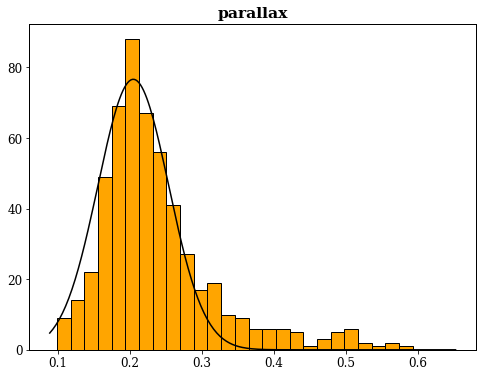

In [371]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'orange');

numero, bins = histograma[0], histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(0.9*bins[0],1.1*bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 16
    # variables        = 3
    chi-square         = 326.407476
    reduced chi-square = 25.1082674
    Akaike info crit   = 54.2489249
    Bayesian info crit = 56.5666911
[[Variables]]
    amplitude:  12.8033330 +/- 0.49449905 (3.86%) (init = 11.56762)
    center:     93.8858820 +/- 0.00333204 (0.00%) (init = 93.89417)
    sigma:      0.07503062 +/- 0.00337395 (4.50%) (init = 0.06024803)
    fwhm:       0.17668360 +/- 0.00794504 (4.50%) == '2.3548200*sigma'
    height:     68.0760915 +/- 2.62200303 (3.85%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.585


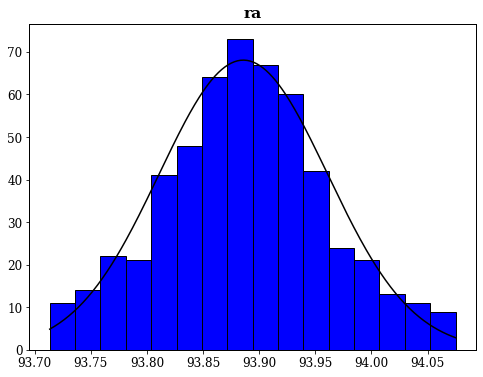

In [372]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 33
    # data points      = 105
    # variables        = 3
    chi-square         = 661.725704
    reduced chi-square = 6.48750690
    Akaike info crit   = 199.293531
    Bayesian info crit = 207.255412
[[Variables]]
    amplitude:  9.99851975 +/- 0.20271297 (2.03%) (init = 11.07174)
    center:    -0.57831274 +/- 0.00125437 (0.22%) (init = -0.5738429)
    sigma:      0.05358232 +/- 0.00125440 (2.34%) (init = 0.04446483)
    fwhm:       0.12617671 +/- 0.00295389 (2.34%) == '2.3548200*sigma'
    height:     74.4430749 +/- 1.50927954 (2.03%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


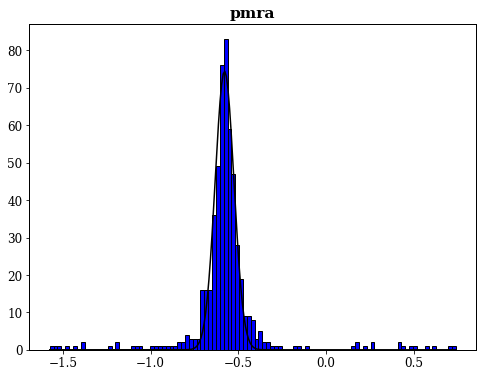

In [373]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmra= [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 15
    # variables        = 3
    chi-square         = 304.375302
    reduced chi-square = 25.3646085
    Akaike info crit   = 51.1531693
    Bayesian info crit = 53.2773199
[[Variables]]
    amplitude:  11.9423700 +/- 0.46472183 (3.89%) (init = 8.695658)
    center:    -18.6633678 +/- 0.00311820 (0.02%) (init = -18.65609)
    sigma:      0.07018177 +/- 0.00322121 (4.59%) (init = 0.04391747)
    fwhm:       0.16526543 +/- 0.00758536 (4.59%) == '2.3548200*sigma'
    height:     67.8853879 +/- 2.61592098 (3.85%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.598


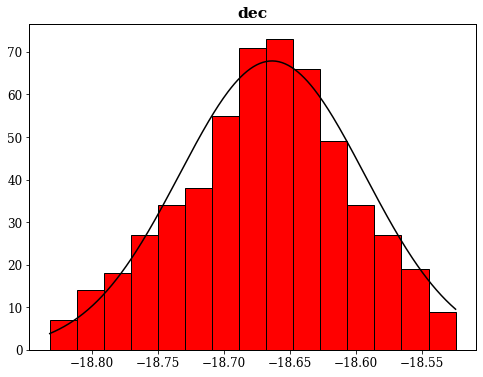

In [374]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_dec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 116
    # variables        = 3
    chi-square         = 1120.97668
    reduced chi-square = 9.92014761
    Akaike info crit   = 269.130390
    Bayesian info crit = 277.391160
[[Variables]]
    amplitude:  11.5609649 +/- 0.29330186 (2.54%) (init = 10.50069)
    center:     1.95034010 +/- 0.00180174 (0.09%) (init = 1.951527)
    sigma:      0.06150493 +/- 0.00180177 (2.93%) (init = 0.03977534)
    fwhm:       0.14483304 +/- 0.00424284 (2.93%) == '2.3548200*sigma'
    height:     74.9884282 +/- 1.90245546 (2.54%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.577


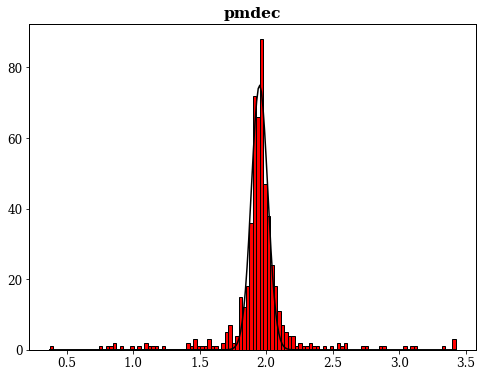

In [375]:
fig, ax = plt.subplots(figsize=(8,6))


data = subset['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'red');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_pmdec = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 45
    # data points      = 96
    # variables        = 3
    chi-square         = 11.5238754
    reduced chi-square = 0.12391264
    Akaike info crit   = -197.513010
    Bayesian info crit = -189.819966
[[Variables]]
    amplitude:  43.9104347 +/- 1.01528523 (2.31%) (init = 956.5578)
    center:     92.8823058 +/- 0.03206639 (0.03%) (init = 92.96214)
    sigma:      1.18399194 +/- 0.03072109 (2.59%) (init = 21.25684)
    fwhm:       2.78808790 +/- 0.07234264 (2.59%) == '2.3548200*sigma'
    height:     14.7954806 +/- 0.33924185 (2.29%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.569


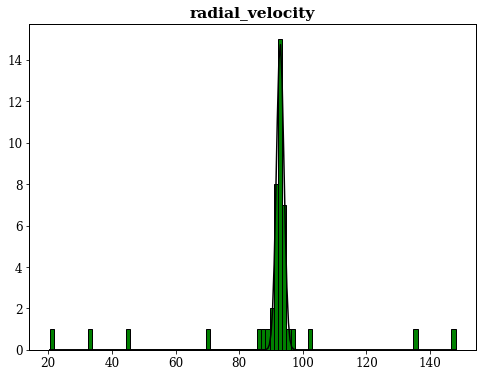

In [376]:
fig, ax = plt.subplots(figsize=(8,6))

ra_vel = subset.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

data = ra_vel['radial_velocity']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'green');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]

valores_radial_velocity= [result.params['center'].value, result.params['sigma'].value]


xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radial_velocity', fontweight = 'bold')

plt.show()

## Sigma Clipping

541
308
284


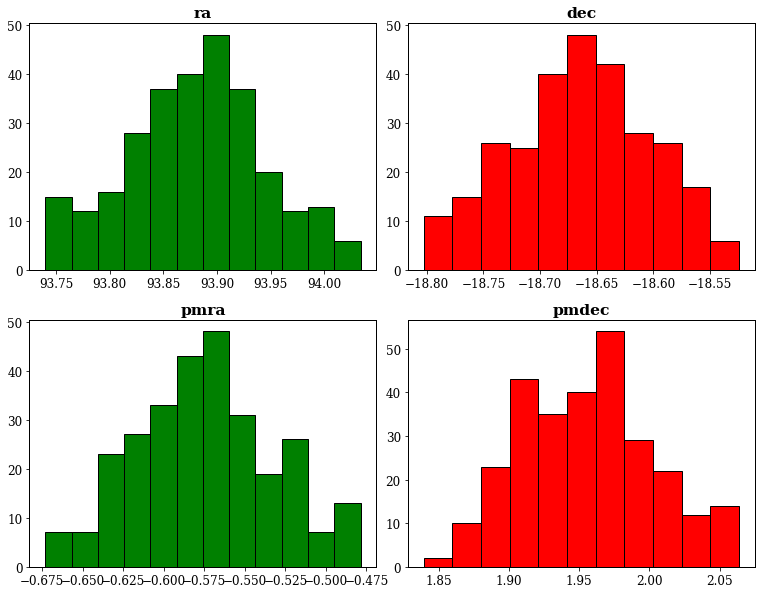

In [377]:
gmodel = GaussianModel()
clip_loop = subset

for i in range(2):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 2

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    ra_up, ra_down = valores_ra[0] + sigma*valores_ra[1], valores_ra[0] - sigma*valores_ra[1]
    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]
    dec_up, dec_down = valores_dec[0] + sigma*valores_dec[1], valores_dec[0] - sigma*valores_dec[1]
    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down) & (clip_loop.ra>ra_down) & (clip_loop.ra<ra_up) & 
                              (clip_loop.dec>dec_down) & (clip_loop.dec<dec_up) & (clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) 
                              & (clip_loop.pmdec<pmdec_up)  & (clip_loop.radial_velocity.isnull() | (clip_loop.radial_velocity>radvel_down) & (clip_loop.radial_velocity<radvel_up)) ]

    
print(len(clip_loop))

fig = plt.figure(figsize = (13,10))
ax1 = fig.add_subplot(4,4, (1,6))
ax2 = fig.add_subplot(4,4, (9,14))
ax3 = fig.add_subplot(4,4, (3,8))
ax4 = fig.add_subplot(4,4, (11,16))

optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax1.hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax2.hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'green');

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax3.hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'red');

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax4.hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');

ax1.set_title('ra', fontweight = 'bold')
ax2.set_title('pmra', fontweight = 'bold')
ax3.set_title('dec', fontweight = 'bold')
ax4.set_title('pmdec', fontweight = 'bold')

plt.subplots_adjust(wspace = 0.2, hspace = 0.5)


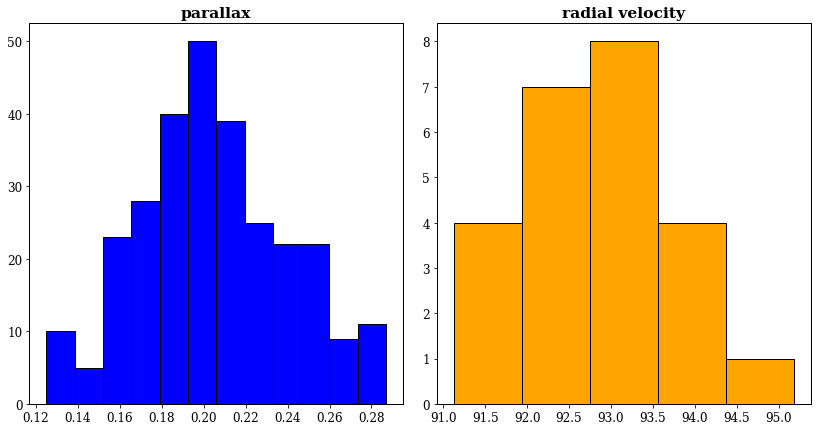

In [378]:
fig = plt.figure(figsize=(14,7))
ax1 = fig.add_subplot(2,4, (1,6))

optimal_bin = np.histogram_bin_edges(clip_loop['parallax'], bins = 'fd')
ax1.hist(clip_loop['parallax'], optimal_bin, ec = 'k',color = 'blue');

ax2 = fig.add_subplot(2,4, (3,8))

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax2.hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');

ax1.set_title('parallax', fontweight = 'bold')
ax2.set_title('radial velocity', fontweight = 'bold');

## FINAL RESULTS

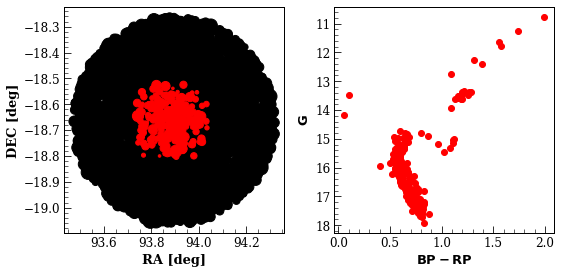

In [379]:
fig, ax = plt.subplots(1,2, figsize=(8,4))
from matplotlib.ticker import AutoMinorLocator

ax[0].scatter(clip_loop.ra,clip_loop.dec, color = 'red',s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*20, zorder = 100)
ax[0].scatter(ndf.ra,ndf.dec, color = 'k', s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*20)


ax[1].scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'], color = 'red')
ax[1].invert_yaxis()



ax[1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0].set_xlabel('RA [deg]', fontweight = 'bold')
ax[0].set_ylabel('DEC [deg]', fontweight = 'bold')
ax[1].set_ylabel(r'$\mathbf{G}$')
ax[1].set_xlabel(r'$\mathbf{BP - RP}$')
plt.tight_layout()
plt.savefig('final_campo_aglomerado.png', format = 'png', dpi = 300)


In [380]:
from astropy.coordinates import Distance

teste =  Distance(parallax=clip_loop['parallax'].to_numpy()*units.mas)

np.min(teste), np.max(teste)

(<Distance 3484.82523738 pc>, <Distance 7993.72498248 pc>)

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

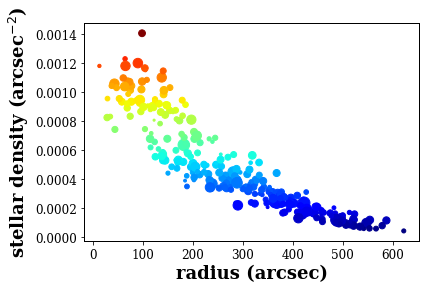

In [381]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



In [382]:
clip_loop.to_csv('final_5d.csv', index=False)

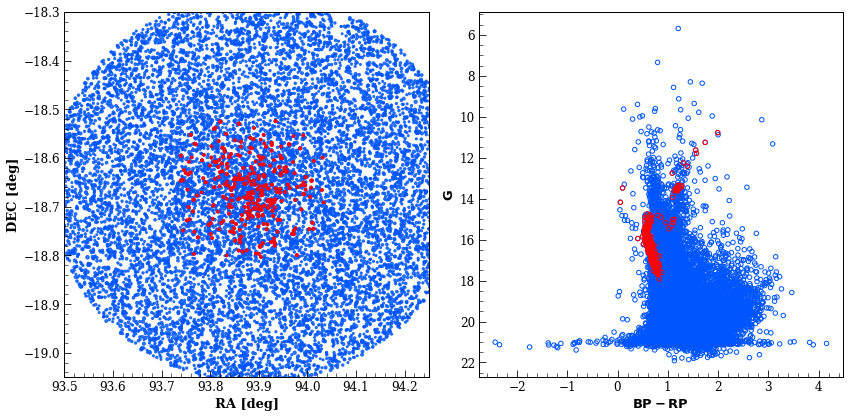

In [383]:
from matplotlib.ticker import AutoMinorLocator

fig = plt.figure(figsize=(12,6))
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))


ax1.scatter(df['ra'],df['dec'], color = '#0055FF',s=(25-df.phot_g_mean_mag), alpha = 0.8)
ax1.set_xlim(93.5,94.25)
ax1.set_ylim(-19.05,-18.3)
ax1.scatter(clip_loop['ra'],clip_loop['dec'], color = 'red', s=(25-clip_loop.phot_g_mean_mag), zorder = 10)
ax1.set_ylabel('DEC [deg]', fontweight = 'bold')
ax1.set_xlabel('RA [deg]', fontweight = 'bold')

ax1.xaxis.set_minor_locator(AutoMinorLocator())
ax1.yaxis.set_minor_locator(AutoMinorLocator())
ax1.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax1.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax1.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)




ax2.scatter(df['bp_rp'],df['phot_g_mean_mag'], color = 'None', edgecolor = '#0055FF', s = 20)
ax2.scatter(clip_loop['bp_rp'], clip_loop['phot_g_mean_mag'], color = 'None', edgecolor = 'red', s =20)
ax2.set_xlabel('BP - RP', fontweight = 'bold')
ax2.set_ylabel('G', fontweight = 'bold')
ax2.invert_yaxis()
ax2.set_ylabel(r'$\mathbf{G}$')
ax2.set_xlabel(r'$\mathbf{BP - RP}$')
#ax2.grid()

ax2.xaxis.set_minor_locator(AutoMinorLocator())
ax2.yaxis.set_minor_locator(AutoMinorLocator())
ax2.tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax2.tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax2.tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

plt.tight_layout()
#plt.savefig('teste.jpg', format = 'jpg', dpi = 300)

## CANTAT

In [384]:
cantat_table = pd.read_csv('table_cantat.csv')
cantat_table.head()

,_RAJ2000,_DEJ2000,_r,RA_ICRS,DE_ICRS,GaiaDR2,Plx,pmRA*,pmDE,RV,o_Gmag,Gmag,BP-RP,proba,Cluster,Teff50,Simbad,_RA.icrs,_DE.icrs
0,93.860491,-18.767444,0.099543,93.860488,-18.767435,2941932991511094016,0.197095,-0.527752,1.958853,NaN,194,16.044838,0.546896,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6789.6300,Simbad,93.860491,-18.767444
1,93.938545,-18.751383,0.097415,93.938542,-18.751374,2941933270687739776,0.168874,-0.604769,2.125844,NaN,236,15.917546,0.616865,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,7150.8320,Simbad,93.938545,-18.751383
2,93.885737,-18.768380,0.098435,93.885734,-18.768372,2941933305047495808,0.136240,-0.536132,1.915721,NaN,204,16.611238,0.647436,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6560.0825,Simbad,93.885737,-18.768380
3,93.916233,-18.746306,0.082901,93.916231,-18.746297,2941933442486435328,0.278221,-0.553534,2.001318,NaN,226,15.243904,0.636387,1.0,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6298.5566,Simbad,93.916233,-18.746306
4,93.917962,-18.736131,0.074381,93.917959,-18.736124,2941933476846171008,0.100664,-0.618487,1.760824,NaN,220,16.019342,0.561467,0.8,http://vizier.u-strasbg.fr/viz-bin/VizieR-4?-i...,6759.6340,Simbad,93.917962,-18.736131


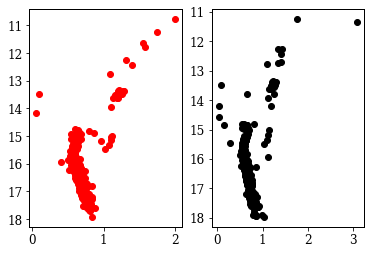

In [385]:
fig = plt.figure()
ax1 = fig.add_subplot(2,2,(1,3))
ax2 = fig.add_subplot(2,2,(2,4))

ax1.scatter(clip_loop['bp_rp'],clip_loop['phot_g_mean_mag'], color = 'red')
ax2.scatter(cantat_table['BP-RP'],cantat_table['Gmag'], color = 'k')
ax1.invert_yaxis()
ax2.invert_yaxis()

Text(0, 0.5, 'stellar density (arcsec$^{-2}$)')

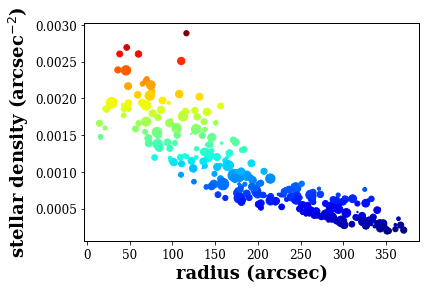

In [386]:
from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=cantat_table['_RAJ2000']*units.degree, dec=cantat_table['_DEJ2000']*units.degree, frame='fk5')

nstar = len(cantat_table)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([cantat_table['_RAJ2000']*np.cos(cantat_table['_DEJ2000']*np.pi/180.0), cantat_table['_DEJ2000']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(cantat_table['_RAJ2000'], weights=den_data)
std_x = np.average((cantat_table['_RAJ2000']-med_x)**2, weights=den_data)**0.5

med_y = np.average(cantat_table['_DEJ2000'], weights=den_data)
std_y = np.average((cantat_table['_DEJ2000']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')

fig, ax = plt.subplots()
ax.scatter(radii,den_data, s=(max(cantat_table['Gmag'])-cantat_table['Gmag'])*20, c=den_data/3600**2, cmap = cor, label='data')
ax.set_xlabel('radius (arcsec)', fontsize=18, fontweight='bold')
ax.set_ylabel('stellar density (arcsec$^{-2}$)', fontsize=18, fontweight='bold')



## PARAMETERS

In [387]:
for i in range(1):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


284


In [388]:
valores_ra, valores_dec

([93.88164213604144, 0.0708669123180754],
 [-18.662318677684773, 0.07640780908721756])

In [389]:
valores_pmra,valores_pmdec

([-0.5766223427399372, 0.04908981781034627],
 [1.953042408625376, 0.057467027446410635])

In [390]:
valores_paralaxe

[0.20141161828363238, 0.03976350921791183]

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 12
    # variables        = 3
    chi-square         = 224.301638
    reduced chi-square = 24.9224042
    Akaike info crit   = 41.1370211
    Bayesian info crit = 42.5917411
[[Variables]]
    amplitude:  7.59029654 +/- 0.51141243 (6.74%) (init = 6.73037)
    center:     93.8816421 +/- 0.00544302 (0.01%) (init = 93.87354)
    sigma:      0.07086691 +/- 0.00564560 (7.97%) (init = 0.05341564)
    fwhm:       0.16687882 +/- 0.01329438 (7.97%) == '2.3548200*sigma'
    height:     42.7292549 +/- 2.84924621 (6.67%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.600


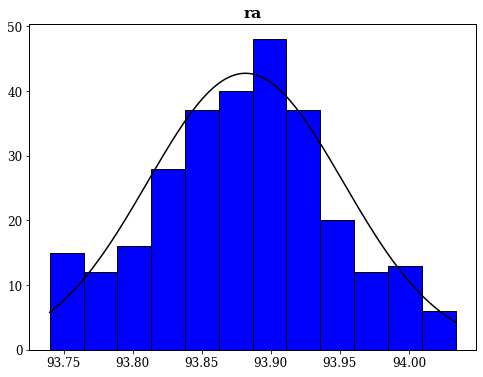

In [391]:
fig, ax = plt.subplots(figsize=(8,6))


data = clip_loop['ra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('ra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 11
    # variables        = 3
    chi-square         = 143.532037
    reduced chi-square = 17.9415046
    Akaike info crit   = 34.2552929
    Bayesian info crit = 35.4489787
[[Variables]]
    amplitude:  8.23616551 +/- 0.47473373 (5.76%) (init = 5.262836)
    center:    -18.6623187 +/- 0.00493256 (0.03%) (init = -18.64964)
    sigma:      0.07640781 +/- 0.00534388 (6.99%) (init = 0.04176854)
    fwhm:       0.17992664 +/- 0.01258387 (6.99%) == '2.3548200*sigma'
    height:     43.0028665 +/- 2.40713126 (5.60%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.630


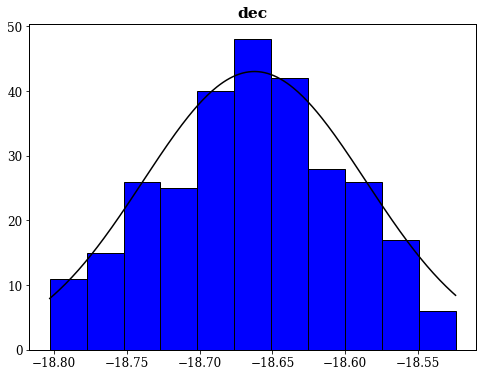

In [392]:
fig, ax = plt.subplots(figsize=(8,6))


data = clip_loop['dec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('dec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 29
    # data points      = 12
    # variables        = 3
    chi-square         = 320.566214
    reduced chi-square = 35.6184682
    Akaike info crit   = 45.4221864
    Bayesian info crit = 46.8769064
[[Variables]]
    amplitude:  5.11828273 +/- 0.41776172 (8.16%) (init = 3.263586)
    center:    -0.57662234 +/- 0.00454434 (0.79%) (init = -0.5758976)
    sigma:      0.04908982 +/- 0.00477623 (9.73%) (init = 0.02653322)
    fwhm:       0.11559768 +/- 0.01124717 (9.73%) == '2.3548200*sigma'
    height:     41.5951734 +/- 3.34330174 (8.04%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.609


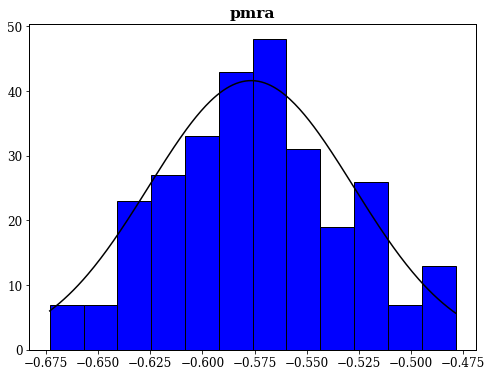

In [393]:
fig, ax = plt.subplots(figsize=(8,6))


data = clip_loop['pmra']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmra', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 21
    # data points      = 11
    # variables        = 3
    chi-square         = 418.209322
    reduced chi-square = 52.2761652
    Akaike info crit   = 46.0189548
    Bayesian info crit = 47.2126407
[[Variables]]
    amplitude:  6.59081046 +/- 0.61784575 (9.37%) (init = 7.010717)
    center:     1.95304241 +/- 0.00610617 (0.31%) (init = 1.951556)
    sigma:      0.05746703 +/- 0.00642800 (11.19%) (init = 0.04494049)
    fwhm:       0.13532451 +/- 0.01513678 (11.19%) == '2.3548200*sigma'
    height:     45.7541168 +/- 4.22122051 (9.23%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.610


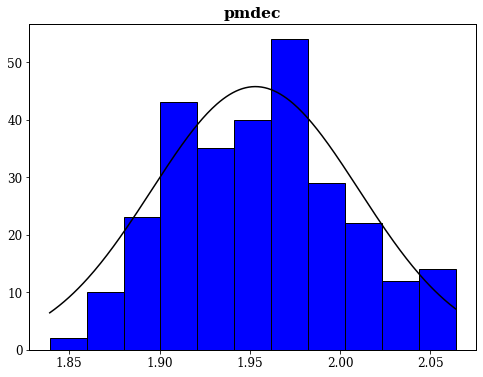

In [394]:
fig, ax = plt.subplots(figsize=(8,6))


data = clip_loop['pmdec']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('pmdec', fontweight = 'bold')

plt.show()

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 37
    # data points      = 12
    # variables        = 3
    chi-square         = 316.853915
    reduced chi-square = 35.2059906
    Akaike info crit   = 45.2824102
    Bayesian info crit = 46.7371301
[[Variables]]
    amplitude:  4.21162296 +/- 0.33954136 (8.06%) (init = 2.979701)
    center:     0.20141162 +/- 0.00364549 (1.81%) (init = 0.1913137)
    sigma:      0.03976351 +/- 0.00380605 (9.57%) (init = 0.02207186)
    fwhm:       0.09363591 +/- 0.00896257 (9.57%) == '2.3548200*sigma'
    height:     42.2546849 +/- 3.36196037 (7.96%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.605


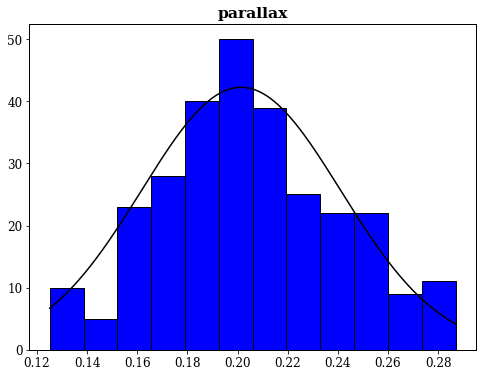

In [395]:
fig, ax = plt.subplots(figsize=(8,6))


data = clip_loop['parallax']
optimal_bin = np.histogram_bin_edges(data, bins = 'fd')

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue');

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('parallax', fontweight = 'bold')

plt.show()

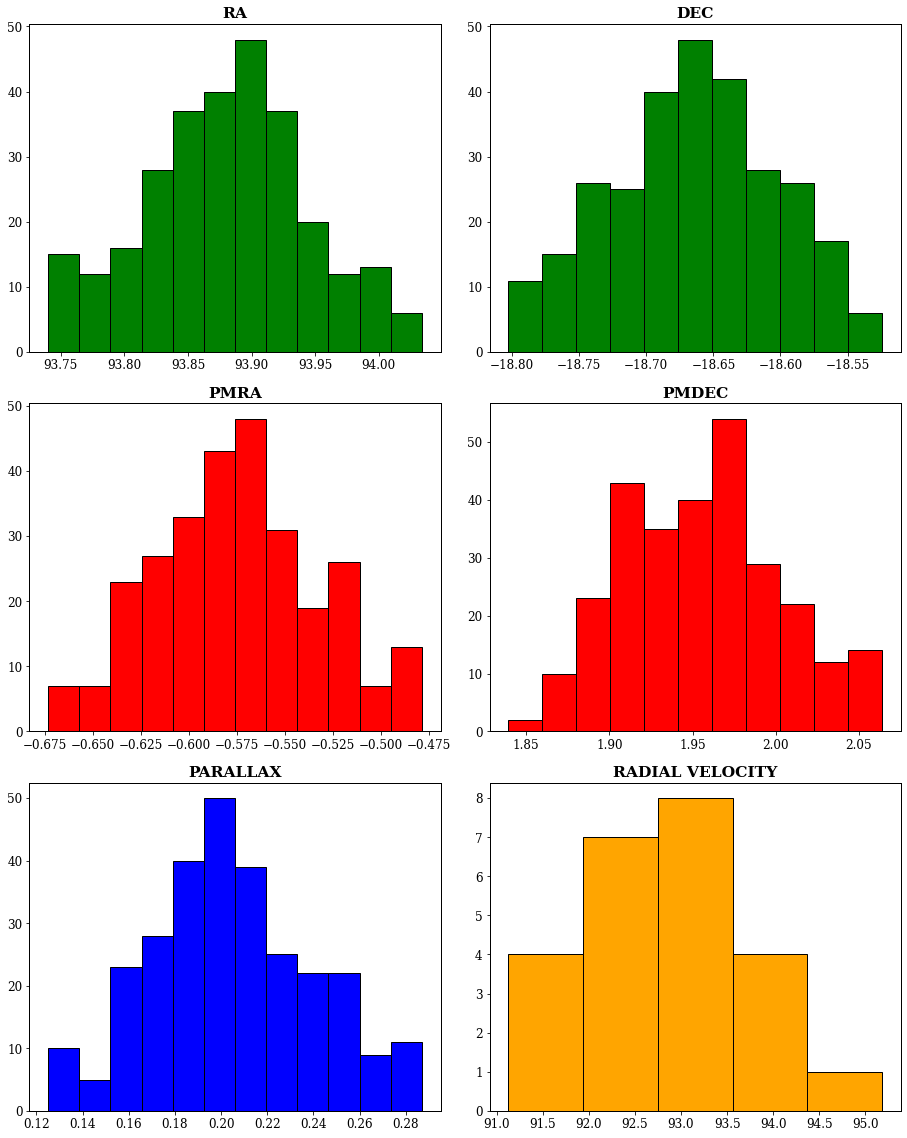

In [396]:
fig, ax = plt.subplots(3,2, figsize=(12.8,16))


optimal_bin = np.histogram_bin_edges(clip_loop['ra'], bins = 'fd')
ax[0,0].hist(clip_loop['ra'], optimal_bin,  ec = 'k', color = 'green');
ax[0,0].set_title('RA', fontweight = 'bold')


optimal_bin = np.histogram_bin_edges(clip_loop['pmra'], bins = 'fd')
ax[1,0].hist(clip_loop['pmra'], optimal_bin,  ec = 'k', color = 'red');
ax[1,0].set_title('PMRA', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['dec'], bins = 'fd')
ax[0,1].hist(clip_loop['dec'], optimal_bin,  ec = 'k', color = 'green');
ax[0,1].set_title('DEC', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['pmdec'], bins = 'fd')
ax[1,1].hist(clip_loop['pmdec'], optimal_bin,  ec = 'k', color = 'red');
ax[1,1].set_title('PMDEC', fontweight = 'bold')

optimal_bin = np.histogram_bin_edges(clip_loop['parallax'], bins = 'fd')
ax[2,0].hist(clip_loop['parallax'], optimal_bin, ec = 'k',color = 'blue');
ax[2,0].set_title('PARALLAX', fontweight = 'bold')

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')
ax[2,1].hist(ra_vel.radial_velocity, optimal_bin, ec = 'k',color = 'orange');
ax[2,1].set_title('RADIAL VELOCITY', fontweight = 'bold')
plt.tight_layout()
plt.savefig('params_ngc2204.png', format = 'png', dpi = 300)


[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 25
    # data points      = 5
    # variables        = 3
    chi-square         = 0.39437095
    reduced chi-square = 0.19718547
    Akaike info crit   = -6.69950615
    Bayesian info crit = -7.87119242
[[Variables]]
    amplitude:  25.6845634 +/- 1.23932153 (4.83%) (init = 14.18348)
    center:     92.7008025 +/- 0.06748472 (0.07%) (init = 93.1539)
    sigma:      1.25303277 +/- 0.07402789 (5.91%) (init = 0.6754036)
    fwhm:       2.95066664 +/- 0.17432236 (5.91%) == '2.3548200*sigma'
    height:     8.17748665 +/- 0.37757784 (4.62%) == '0.3989423*amplitude/max(1e-15, sigma)'
[[Correlations]] (unreported correlations are < 0.100)
    C(amplitude, sigma) = 0.647
    C(center, sigma)    = -0.115


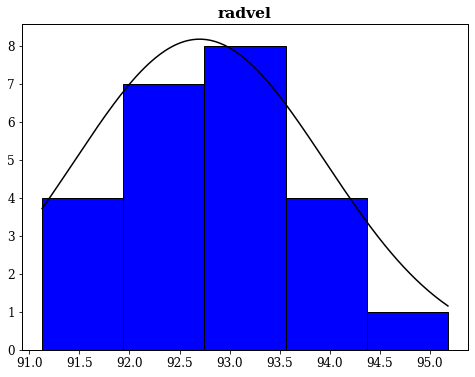

In [397]:
ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
optimal_bin = np.histogram_bin_edges(ra_vel['radial_velocity'], bins = 'fd')

fig, ax = plt.subplots(figsize=(8,6))


data = ra_vel['radial_velocity']

histograma = ax.hist(data, optimal_bin, ec = 'k',color = 'blue')

numero, bins = histograma[0],histograma[1]

centralizar = (bins[1] - bins[0])/2

teste = np.linspace(bins.min(),bins.max(),len(bins) -1)

jpt = np.linspace(np.min(data) + centralizar, np.max(data) - centralizar, len(numero))


gmodel = GaussianModel()

inicial = gmodel.guess(numero, x = teste)

result = gmodel.fit(numero, inicial, x=teste)


print(result.fit_report())



parametros = [result.params['height'].value, result.params['center'].value, result.params['sigma'].value]
valores_ra = [result.params['center'].value, result.params['sigma'].value]

xplot = np.linspace(bins[0],bins[-1],128*2)

ax.plot(xplot,gaussiana(xplot,*parametros), color = 'k')

ax.set_title('radvel', fontweight = 'bold')

plt.show()

In [401]:
gmodel = GaussianModel()
clip_loop = subset


print(len(clip_loop))

j = 2

for i in range(j):
    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]
    
    sigma = 2

    pmra_up, pmra_down = valores_pmra[0] + sigma*valores_pmra[1], valores_pmra[0] - sigma*valores_pmra[1]

    pmdec_up, pmdec_down = valores_pmdec[0] + sigma*valores_pmdec[1], valores_pmdec[0] - sigma*valores_pmdec[1]

    clip_loop = clip_loop.loc[(clip_loop.pmra>pmra_down) & (clip_loop.pmra<pmra_up) & (clip_loop.pmdec>pmdec_down) 
                              & (clip_loop.pmdec<pmdec_up)]

    
print(len(clip_loop))

gmodel = GaussianModel()

for i in range(2):

    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


    sigma = 2

    paralaxe_up, paralaxe_down = valores_paralaxe[0] + sigma*valores_paralaxe[1], valores_paralaxe[0] - sigma*valores_paralaxe[1]
    clip_loop = clip_loop.loc[(clip_loop.parallax < paralaxe_up ) & (clip_loop.parallax > paralaxe_down)]



for i in range(1):
    ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
    data = ra_vel['radial_velocity']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_radial_velocity = [result.params['center'].value, result.params['sigma'].value]
    
    sigma = 3
    
    radvel_up, radvel_down = valores_radial_velocity[0] + sigma*valores_radial_velocity[1], valores_radial_velocity[0] - sigma*valores_radial_velocity[1]
    clip_loop = clip_loop.loc[(clip_loop.radial_velocity.isnull() | (clip_loop.radial_velocity>radvel_down) & (clip_loop.radial_velocity<radvel_up)) ]

ra_vel = clip_loop.dropna(how='any',subset=['radial_velocity'])
print(len(clip_loop))

clip_loop.to_csv('final_semradec.csv', index = False)



541
358
299


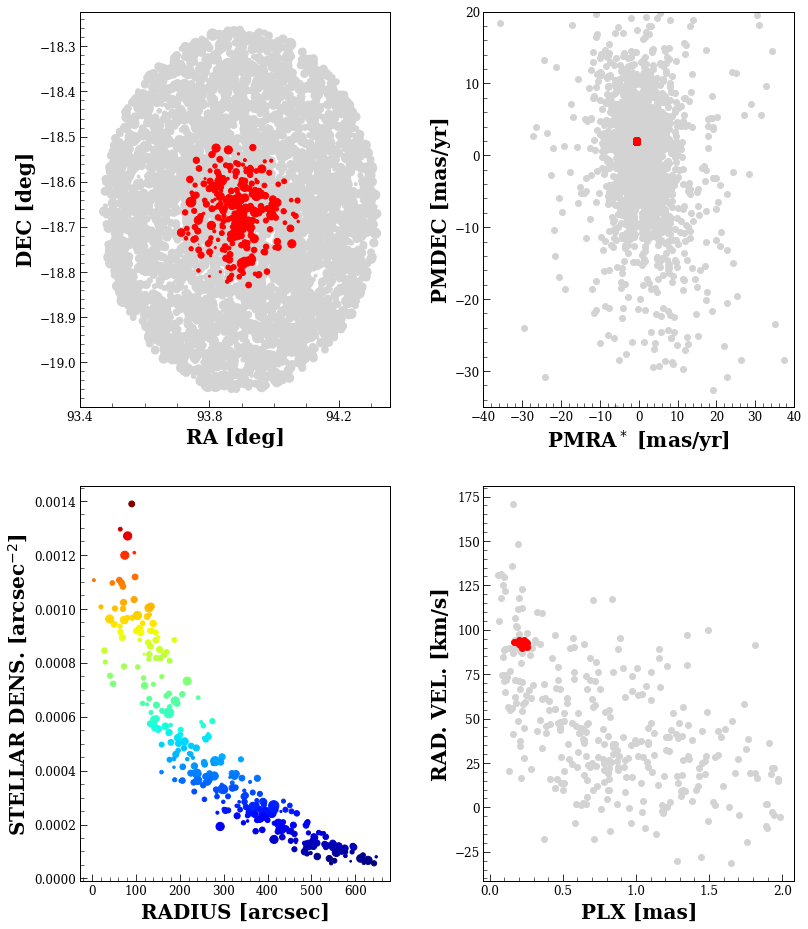

In [413]:
fig, ax = plt.subplots(2,2, figsize=(12.8,16))

ax[0,0].scatter(clip_loop.ra, clip_loop.dec, color = 'red', s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, zorder = 100)
ax[0,0].scatter(ndf.ra, ndf.dec, color = 'lightgray', s=(max(ndf['phot_g_mean_mag'])-ndf['phot_g_mean_mag'])*15)
ax[0,0].set_xlabel('RA [deg]', fontweight = 'bold', fontsize = 20)
ax[0,0].set_ylabel('DEC [deg]', fontweight = 'bold', fontsize = 20)



ax[0,1].scatter(clip_loop.pmra, clip_loop.pmdec, color = 'red', zorder= 100)
ax[0,1].scatter(ndf.pmra, ndf.pmdec, color = 'lightgray')
ax[0,1].set_xlabel('PMRA$^*$ [mas/yr]', fontweight = 'bold', fontsize = 20)
ax[0,1].set_ylabel('PMDEC [mas/yr]', fontweight = 'bold', fontsize = 20)
ax[0,1].set_xlim(-40,40)
ax[0,1].set_ylim(-35,20)


ra_vel_ndf = ndf.dropna(how='any',subset=['radial_velocity'])
ra_vel_ndf = ra_vel_ndf.loc[ra_vel_ndf.parallax <2]

ax[1,1].scatter(ra_vel.parallax, ra_vel.radial_velocity, color = 'red', zorder= 100)
ax[1,1].scatter(ra_vel_ndf.parallax, ra_vel_ndf.radial_velocity, color = 'lightgray')
ax[1,1].set_xlabel('PLX [mas]', fontweight = 'bold',fontsize = 20)
ax[1,1].set_ylabel('RAD. VEL. [km/s]', fontweight = 'bold',fontsize = 20)


ax[0,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[1,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)

ax[0,1].xaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].yaxis.set_minor_locator(AutoMinorLocator())
ax[0,1].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[0,1].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[0,1].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)



from astropy.coordinates import SkyCoord, Angle
from astropy import units

catalog = SkyCoord(ra=clip_loop['ra']*units.degree, dec=clip_loop['dec']*units.degree, frame='fk5')

nstar = len(clip_loop)

#.Definindo o vizinho apropriado para a abertura

k = np.sqrt(nstar).astype(int)

#.criando a estrutura de vizinhos proximos
coords = np.array([clip_loop['ra']*np.cos(clip_loop['dec']*np.pi/180.0), clip_loop['dec']]).T
nn_struct = NearestNeighbors(n_neighbors=k, algorithm='auto', metric='euclidean')
nn_struct.fit(coords)
distances, index = nn_struct.kneighbors(coords)
             

#.obtendo a distancia do k-esimo vizinho mais proximo
aperture = distances[:,k-1]*units.degree
area = np.pi*(aperture.value)**2# + area_cor(data, data.DEC, aperture.value)
den_data = k/area
den_sigm = np.sqrt(k)/area

den_data /= 3600**2
den_sigm /= 3600**2

med_x = np.average(clip_loop['ra'], weights=den_data)
std_x = np.average((clip_loop['ra']-med_x)**2, weights=den_data)**0.5

med_y = np.average(clip_loop['dec'], weights=den_data)
std_y = np.average((clip_loop['dec']-med_y)**2, weights=den_data)**0.5

center = SkyCoord(med_x*units.degree, med_y*units.degree)
radii = center.separation(catalog)
radii = radii.to(units.arcsec).value


import matplotlib.cm as cm
cor = cm.get_cmap('jet')


ax[1,0].scatter(radii,den_data, s=(max(clip_loop['phot_g_mean_mag'])-clip_loop['phot_g_mean_mag'])*15, c=den_data/3600**2, cmap = cor)
ax[1,0].set_xlabel('RADIUS [arcsec]', fontweight='bold', fontsize = 20)
ax[1,0].set_ylabel('STELLAR DENS. [arcsec$^{-2}$]', fontweight='bold', fontsize = 20)


ax[1,0].xaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].yaxis.set_minor_locator(AutoMinorLocator())
ax[1,0].tick_params(which = 'major', axis = 'y', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'y', direction='in', length = 4)
ax[1,0].tick_params(which = 'major', axis = 'x', direction='in', length = 7)
ax[1,0].tick_params(which = 'minor', axis = 'x', direction='in', length = 4)


ax[0,0].set_xticks(ax[0,0].get_xticks()[::2])



plt.subplots_adjust(hspace=0.2, wspace = 0.3)
plt.savefig('ngc2204_3plot.png', format = 'png', dpi = 300)


In [404]:
for i in range(1):
    print(len(clip_loop))
    data = clip_loop['ra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_ra = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmra']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmra = [result.params['center'].value, result.params['sigma'].value]
    
    data = clip_loop['dec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_dec = [result.params['center'].value, result.params['sigma'].value]

    data = clip_loop['pmdec']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_pmdec = [result.params['center'].value, result.params['sigma'].value]


    data = clip_loop['parallax']
    optimal_bin = np.histogram_bin_edges(data, bins = 'fd')
    numero, bins = np.histogram(data, optimal_bin)
    teste = np.linspace(bins.min(),bins.max(),len(bins) -1)
    inicial = gmodel.guess(numero, x = teste)
    result = gmodel.fit(numero, inicial, x=teste)
    valores_paralaxe = [result.params['center'].value, result.params['sigma'].value]


299


In [412]:
valores_radial_velocity

[92.26890249069027, 0.9591938441363128]

In [407]:
valores_dec

[-18.66387448675185, 0.07423093651670909]

In [408]:
valores_pmra

[-0.5789126269861097, 0.04557292787470457]

In [409]:
valores_pmdec

[1.9526546978758261, 0.057561249179717056]

In [410]:
valores_paralaxe

[0.20288941635220742, 0.040118028972553565]